In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
crypto_df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


# Data Cleaning

In [5]:
crypto_df_new = crypto_df.copy()

crypto_df_new = crypto_df_new.loc[crypto_df_new.IsTrading == True].reset_index(drop=True)

crypto_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [6]:
crypto_df_new = crypto_df_new.dropna(how="any").reset_index(drop=True)
crypto_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [7]:
crypto_df_new.sort_values(by="TotalCoinsMined")

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
667,FIII,Fiii,SHA3-256,True,DPoC,-5.917978e+09,5000000000
408,LBTC,LiteBitcoin,Scrypt,True,PoW,0.000000e+00,1000000000
101,RIPO,RipOffCoin,Scrypt,True,PoW,0.000000e+00,12000000
291,BASH,LuckChain,Scrypt,True,PoW/PoS,0.000000e+00,1000000000
287,CSH,CashOut,SHA-256,True,PoW,0.000000e+00,100000000
...,...,...,...,...,...,...,...
571,QWC,Qwertycoin,CryptoNight Heavy,True,PoW,9.955311e+10,184470000000
407,NYC,NewYorkCoin,Scrypt,True,PoW,1.430067e+11,0
395,GCN,gCn Coin,Scrypt,True,PoW,1.630551e+11,200000000000
136,BCN,ByteCoin,CryptoNight,True,PoW,1.840668e+11,184467440735


In [8]:
mask = crypto_df_new.TotalCoinsMined > 0
crypto_df_new = crypto_df_new.loc[mask].reset_index(drop=True)
crypto_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [9]:
crypto_df_new["TotalCoinSupply"] = pd.to_numeric(crypto_df_new.TotalCoinSupply)
crypto_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    float64
dtypes: bool(1), float64(2), object(4)
memory usage: 25.6+ KB


In [10]:
[x for x in crypto_df_new.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoS/LPoS',
 'PoS/PoW/PoT',
 'PoW + Hive',
 'PoW/PoS ',
 'PoW/PoW',
 'PoW and PoS',
 'Zero-Knowledge Proof',
 'LPoS',
 'dPoW/PoW',
 'TPoS',
 'PoW/nPoS',
 'PoA',
 'HPoW',
 'Proof of Authority',
 'PoST',
 'DPOS',
 'Proof of Trust',
 'Pos',
 'POBh']

In [11]:
crypto_df_new.loc[crypto_df_new.ProofType == "PoW/PoS ", "ProofType"] = "PoW/PoS"
crypto_df_new.loc[crypto_df_new.ProofType == "Pos", "ProofType"] = "PoS"
crypto_df_new.loc[crypto_df_new.ProofType == "Proof of Authority", "ProofType"] = "PoA"
crypto_df_new.loc[crypto_df_new.ProofType == "PoW and PoS", "ProofType"] = "PoW/PoS"
crypto_df_new.loc[crypto_df_new.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [12]:
[x for x in crypto_df_new.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoA',
 'LPoS',
 'PoS/PoW/PoT',
 'PoW + Hive',
 'PoW/PoW',
 'Zero-Knowledge Proof',
 'dPoW/PoW',
 'PoS/LPoS',
 'TPoS',
 'PoW/nPoS',
 'HPoW',
 'PoT',
 'PoST',
 'DPOS',
 'POBh']

In [13]:
crypto_df_new.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
2,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
3,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07
4,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00


In [14]:
crypto_df_final = crypto_df_new.loc[:, ["Algorithm", "ProofType", "TotalCoinsMined", "TotalCoinSupply"]]
crypto_df_final.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [15]:
crypto_df_final = pd.get_dummies(crypto_df_final)
crypto_df_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
scaler = StandardScaler()
scaler = scaler.fit(crypto_df_final)

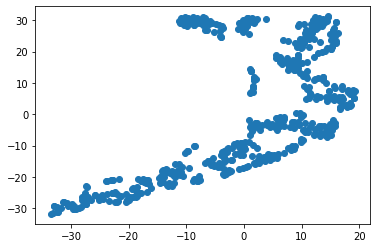

In [17]:
tsne = TSNE(learning_rate=50)
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_df_final)
tsne_features.shape

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# PCA

In [18]:
pca = PCA()
pca.fit(crypto_df_final)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[8.75717060e-01 1.24282940e-01 5.88914043e-23 3.86488120e-23
 3.04741286e-23 1.67519737e-23 1.03968178e-23 5.03794807e-24
 4.71157873e-24 4.33604849e-24 4.06120296e-24 3.31604846e-24
 3.08418177e-24 2.78820604e-24 2.59091747e-24 2.53497960e-24
 2.10788008e-24 1.89104022e-24 1.62514145e-24 1.35835988e-24
 1.12906993e-24 1.12906992e-24 1.12903579e-24 1.12876168e-24
 1.12198575e-24 1.08055418e-24 9.71462200e-25 9.20737330e-25
 8.99671571e-25 8.47299850e-25 8.43749895e-25 8.06325269e-25
 7.78734231e-25 7.21230261e-25 6.67605730e-25 5.68281342e-25
 5.64535031e-25 5.64534988e-25 5.64534960e-25 5.64534932e-25
 5.64534890e-25 5.63712723e-25 5.60721785e-25 5.57884742e-25
 5.40677146e-25 5.19563965e-25 4.21667030e-25 3.71722494e-25
 2.82267686e-25 2.82267536e-25 2.82267492e-25 2.82267489e-25
 2.82267487e-25 2.82267487e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.82267480e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.82267480e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.822674

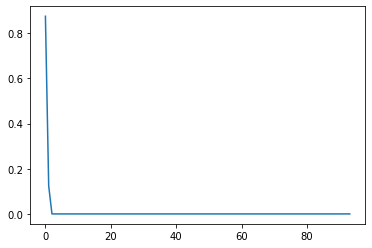

In [19]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

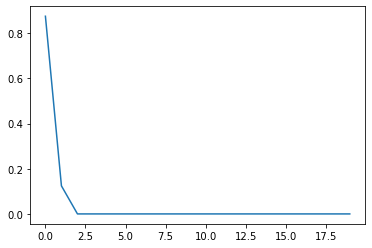

In [20]:
plt.plot(range(20), pca.explained_variance_ratio_[0:20])
plt.show()

In [21]:
pca = PCA(n_components=0.90)
pca.fit(crypto_df_final)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.87571706 0.12428294]
1.0


In [22]:
print(len(pca.explained_variance_ratio_))

2


In [24]:
pca_1 = pca.transform(crypto_df_final)
pca_1 = pd.DataFrame(pca_1, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
pca_1.head()

,PCA1,PCA2
0,-1.162934e+10,-5.502574e+08
1,-1.064088e+10,-1.197852e+09
2,2.750507e+11,1.312370e+11
3,-1.160219e+10,-5.552767e+08
4,-1.157548e+10,-6.435026e+08


# TNSE

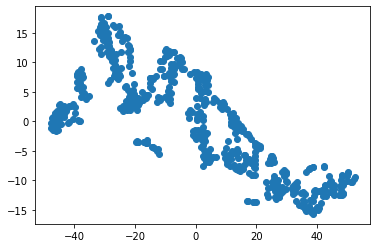

In [25]:
tsne = TSNE(learning_rate=50)
# Reduce dimensions
tsne_features = tsne.fit_transform(pca_1)
tsne_features.shape

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# KMEANS with PCA

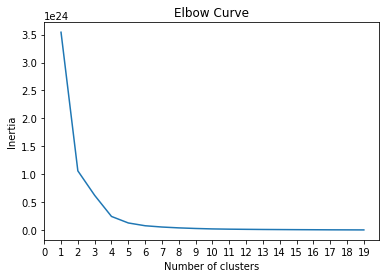

In [26]:
# Finding the best value for k
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_1)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

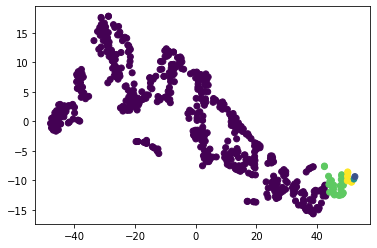

In [30]:
# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(pca_1)

# Predict clusters
predictions = model.predict(pca_1)

# Add the predicted class column to the dataframe
pca_1["class"] = model.labels_
pca_1.head()

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=pca_1["class"])
plt.show()

K-Means is not good with outliers and noisy data. Looking at the above scatter plot indicates that most of the data is located in one group with a few outliers in separate groups
